<a href="https://colab.research.google.com/github/NihaarikaJagadish/Machine-Learning-Assignment3/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question2.


The dimensions of X is: (150, 2)
The dimensions of Y is: (150, 1)
Cost after iteration number 0 : 0.693147
Cost after iteration number 1000 : 0.677959
Cost after iteration number 2000 : 0.665700
Cost after iteration number 3000 : 0.655777
Cost after iteration number 4000 : 0.647715
Cost after iteration number 5000 : 0.641135
Cost after iteration number 6000 : 0.635739
Cost after iteration number 7000 : 0.631289
Cost after iteration number 8000 : 0.627595
Cost after iteration number 9000 : 0.624507
Training accuracy: 66.0%
Testing accuracy: 68.0%


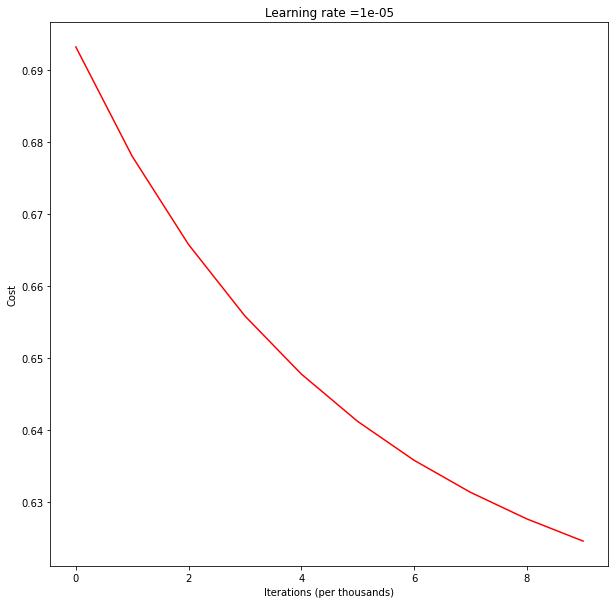

In [1]:
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
%matplotlib inline

def initialiseFunction(dimensions): #initialise parameters
  w = np.zeros((dimensions,1))
  return w

def sigmoidFunction(z): #Sigmoid Function
  return 1/(1+np.exp(-z))

def logisticLossFunction(X,Y,w): #Calculating the logistic loss
  z = np.dot(X,w)
  h = sigmoidFunction(z)
  cost = (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()
  dw = np.dot(X.T, (h-Y))/Y.size
  return dw, cost

def calculateGradientDescentFunction(X,Y,w,learning_rate=0.1, num_iterations=100, print_cost = False): #Calculating the Gradient Descent function
  costs = []
  for i in range(num_iterations):
    dw, cost = logisticLossFunction(X,Y,w)
    w = w - learning_rate * dw
    if print_cost and (i%1000 == 0):
      costs.append(cost)
      print("Cost after iteration number %i : %f"%(i,cost))
  return w, dw, costs

def predictProbability(X,w): #Predict probability  function
  z = np.dot(X,w)
  Y_prob = sigmoidFunction(z)
  return Y_prob

def predictClassFunction(X,w,threshold):
  y_pred = []
  y_prob = predictProbability(X,w)
  for i in range(len(y_prob)):
    if(y_prob[i] >= threshold):
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

#logistic regression classifier
def logisticFunction(X_train, Y_train, X_test, Y_test, learning_rate = 0.1, num_iterations = 1, print_cost = False, threshold = 0.5):
  w = initialiseFunction(X_train.shape[1]) #initialize the parameters
  w,dw,costs = calculateGradientDescentFunction(X_train, Y_train, w, learning_rate, num_iterations, print_cost)
  #predict the probabilities and get predicted_y for train.
  y_prob_train = predictProbability(X_train, w)
  y_prob_test = predictProbability(X_test, w)
  #predict the probabilities and get predicted_y for test.
  y_pred_train = predictClassFunction(X_train,w,threshold)
  y_pred_test = predictClassFunction(X_test,w,threshold)
  Y_train = np.squeeze(Y_train)
  Y_test = np.squeeze(Y_test)
  #calculate the accuracy
  print("Training accuracy: {}%".format(100 - np.mean(np.abs(y_pred_train - Y_train)) * 100))
  print("Testing accuracy: {}%".format(100 - np.mean(np.abs(y_pred_test - Y_test)) * 100))
  #return all of them in a dictionary
  result = {
      "costs" : costs,
      "Y_Prediction_Test" : y_pred_test,
      "Y_Prediction_Train" : y_pred_train,
      "Y_prob_train":y_prob_train,
      "Y_prob_test":y_prob_test,
      "w" : w,
      "learning_rate" : learning_rate,
      "num_iterations" : num_iterations
  }
  return result




def plottingCurve(results): # Plot learning curve with costs
  costs = np.squeeze(results['costs'])
  plt.figure( figsize=(10,10))
  plt.plot(costs, color="red")
  plt.ylabel('Cost')
  plt.xlabel('Iterations (per thousands)')
  plt.title("Learning rate =" + str(results["learning_rate"]))
  plt.show()

#Testing the logistic regression function

iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
y = y.reshape((y.shape[0],1))
print("The dimensions of X is:",X.shape)
print("The dimensions of Y is:",y.shape)
# print(np.squeeze(y))


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
d = logisticFunction(X_train, Y_train, X_test, Y_test, 0.00001,  10000, True)
plottingCurve(d)

Question3.

--- Confusion Matrix is as below ---
- Predicted = yes ---- Predicted = No --------
Actual - Yes :  66  | FN :  0
Actual - No  :  34  | TN :  0
probs 100
Thresholds :  39
False Positive Rates: 
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.058823529411764705
0.058823529411764705
0.058823529411764705
0.058823529411764705
0.058823529411764705
0.058823529411764705
0.08823529411764706
0.08823529411764706
0.11764705882352941
0.11764705882352941
0.17647058823529413
0.23529411764705882
0.23529411764705882
0.23529411764705882
0.23529411764705882
0.2647058823529412
0.3235294117647059
0.35294117647058826
0.4117647058823529
0.5588235294117647
0.5588235294117647
0.5882352941176471
0.6470588235294118
0.7352941176470589
0.7352941176470589
0.7647058823529411
0.7647058823529411
1.0
True Positive Rates: 
0.0
0.015151515151515152
0.19696969696969696
0.22727272727272727
0.25757575757575757
0.3181818181818182
0.36363636363636365
0.3939393939393939
0.5454545454545454
0.5757575757575758
0.6515151515151515
0

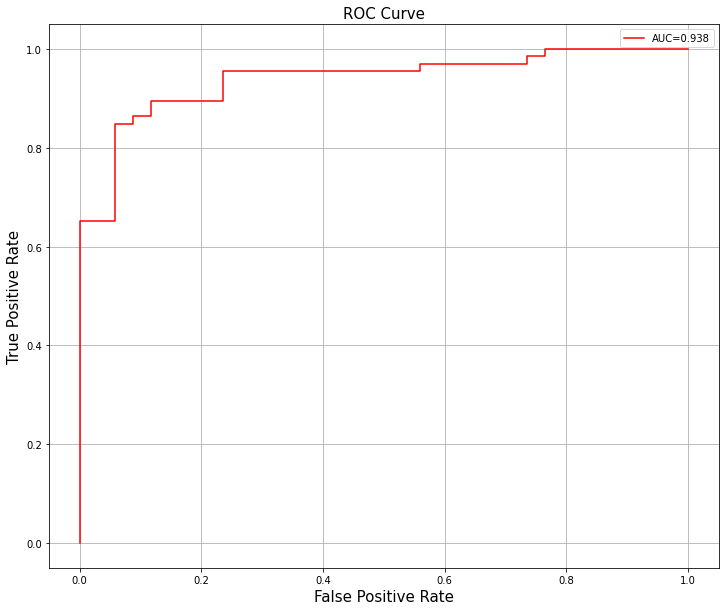

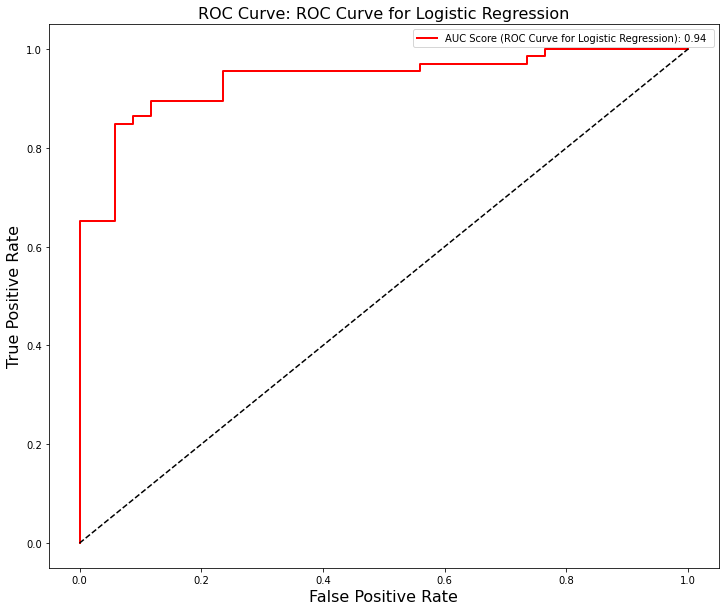

In [2]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 1, num=100)

def confusionMatrixFunction(actual, predicted, printResult = False):
  TP, FP, TN, FN = 0,0,0,0
  for a,p in zip(actual,predicted) :
    if ((a == p) and a == 1): #True Positive
      TP+=1
    if ((a == p) and a == 0): #True Negative
      TN+=1
    if ((a != p) and a == 1): #False Negative
      FN+=1
    if ((a != p) and a == 0): #False Positives
      FP+=1
  if(printResult):
    print('--- Confusion Matrix is as below ---')
    print('- Predicted = yes ---- Predicted = No --------')
    print('Actual - Yes : ',TP , ' | FN : ', FN)
    print('Actual - No  : ',FP , ' | TN : ', TN)
  return {'TP':TP,'FN':FN,'FP':FP,'TN':TN}


probs = d['Y_prob_train']
probs = np.squeeze(probs)
y_preds = d['Y_Prediction_Train']
y_original = np.squeeze(Y_train)
confusionMatrixFunction(y_original, y_preds,True)
def calculateThresholdFunction(actuals, scores, threshold=0.5, positive_label=1):
    tp=fp=tn=fn=0
    for score,actual in zip(scores,actuals):
        if score >= threshold:                     # predicted positive 
            if actual == positive_label:           # actual positive 
                tp += 1
            else:                                  # actual negative              
                fp += 1          
        else:                                      # predicted negative 
            if not (actual == positive_label):     # actual negative 
                tn += 1                          
            else:                                  # actual positive 
                fn += 1
    return {'TP':tp,'FN':fn,'FP':fp,'TN':tn}
calculateThresholdFunction(y_original, probs,0.5,1)


def plotROCFunction(Y,Yhat,probs):
  fig, ax = plt.subplots(1,1, figsize=(12,10))
  TPR = dict()
  FPR = dict()
  # generate thresholds over score domain 
  low = min(probs)
  high = max(probs)
  mid = (low+high)/2
  FPR_list, TPR_list, thresholds = roc_curve(y_original, probs)
  auc = roc_auc_score(y_original, probs)
  #Plotting final ROC curve
  ax.plot(FPR_list, TPR_list, color='red')
  ax.set_title("ROC Curve", fontsize=15)
  ax.set_ylabel('True Positive Rate', fontsize=15)
  ax.set_xlabel('False Positive Rate', fontsize=15)
  ax.grid()
  ax.legend(["AUC=%.3f"%auc])
  fig.show()

plotROCFunction(y_original,y_preds,probs)

def plotROCCurve(y_original, probs):
  title = 'ROC Curve for Logistic Regression'
  label = 'None'
  fpr, tpr, thresholds = roc_curve(y_original, probs) # calculate the ROC score
  print('probs',len(np.squeeze(probs)))
  print('Thresholds : ',len(thresholds))
  print('False Positive Rates: ')
  for eachValue in fpr:
      print(eachValue)
  print('True Positive Rates: ')
  for eachValue in tpr:
      print(eachValue)
#   print('True Positive Rate: ',tpr)
  print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs)))    
  label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs))
  # plotting the ROC curve
  plt.figure( figsize=(12,10))
  plt.plot(fpr, tpr, linewidth=2, label=label, color='r')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC Curve: {}'.format(title), fontsize=16)
  plt.legend(loc='upper right')
  plt.show()

plotROCCurve(y_original,probs)

Question4.

In [7]:
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame,Series
import pandas as pd
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame,Series
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from itertools import cycle
import matplotlib.pyplot as plt
%matplotlib inline


# 0 - I am considering Malignant as 0 
# 1 - I am considering Benign as 1
dataset = load_breast_cancer()
classes = dataset.target_names
print("The output classes are:", classes)
# print("The data description is as below")
# print(data.DESCR)

dataFrameForX = DataFrame(dataset['data'],columns=dataset['feature_names']) #creating data frames with features
dataFrameForY = DataFrame(dataset['target'],columns=['target'])          #creating dataFrame with Labels
dataDF = dataFrameForX.join(dataFrameForY)                                 #Merging the dataframes
print(len(dataFrameForY))
print(dataset['target'].shape)
dataDF.head()


The output classes are: ['malignant' 'benign']
569
(569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
TrainingSetForX, TestingDataForX, TrainingSetForY, TestingDataForY = train_test_split(dataFrameForX, dataFrameForY, test_size = 0.33, random_state = 1) # Getting the testing data. I am considering 33% as Testing data and the 77% as Training data
d = logisticFunction(TrainingSetForX, TrainingSetForY, TestingDataForX, TestingDataForY, 0.00001,  10000, True)


Cost after iteration number 0 : 0.693147
Cost after iteration number 1000 : 0.254450
Cost after iteration number 2000 : 0.227522
Cost after iteration number 3000 : 0.216847
Cost after iteration number 4000 : 0.211264
Cost after iteration number 5000 : 0.207845
Cost after iteration number 6000 : 0.205505
Cost after iteration number 7000 : 0.203760
Cost after iteration number 8000 : 0.202371
Cost after iteration number 9000 : 0.201208
Training accuracy: 91.60104986876641%
Testing accuracy: 92.55319148936171%


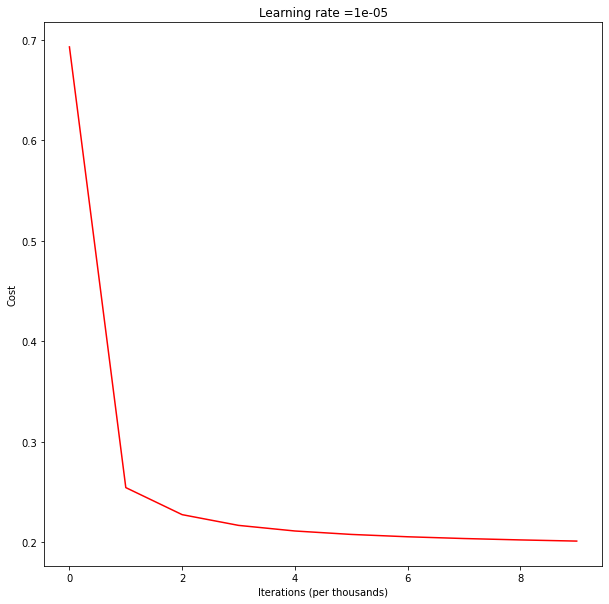

In [10]:
plottingCurve(d)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotROC(Y,Yhat,probs):
  fig, ax = plt.subplots(1,1, figsize=(12,10))
  TPR = dict()
  FPR = dict()
  
  # generate thresholds over score domain 
  low = min(probs)
  high = max(probs)
  mid = (low+high)/2
  #print(low)
  #print(high)
  FPR_list, TPR_list, thresholds = roc_curve(y_original, probs)
  auc = roc_auc_score(y_original, probs)
  #Plotting final ROC curve
  ax.plot(FPR_list, TPR_list, color='red')
  #ax.plot(x,x, "--")
  # ax.plot([0, 1], [0, 1], 'k--')
  # ax.set_xlim([0,1])
  # ax.set_ylim([0,1])
  ax.set_title("ROC Curve", fontsize=15)
  ax.set_ylabel('TPR', fontsize=15)
  ax.set_xlabel('FPR', fontsize=15)
  ax.grid()
  ax.legend(["AUC=%.3f"%auc])
  fig.show()

False Positive Rates: 
0.0
0.0
0.0
0.006802721088435374
0.006802721088435374
0.013605442176870748
0.013605442176870748
0.02040816326530612
0.02040816326530612
0.027210884353741496
0.027210884353741496
0.034013605442176874
0.034013605442176874
0.04081632653061224
0.04081632653061224
0.05442176870748299
0.05442176870748299
0.061224489795918366
0.061224489795918366
0.06802721088435375
0.06802721088435375
0.07482993197278912
0.07482993197278912
0.08163265306122448
0.08163265306122448
0.08843537414965986
0.08843537414965986
0.10204081632653061
0.10204081632653061
0.10884353741496598
0.10884353741496598
0.1360544217687075
0.1360544217687075
0.1564625850340136
0.1564625850340136
0.17006802721088435
0.17006802721088435
0.1836734693877551
0.1836734693877551
0.3129251700680272
0.3129251700680272
1.0
True Positive Rates: 
0.0
0.004273504273504274
0.4230769230769231
0.4230769230769231
0.45726495726495725
0.45726495726495725
0.5512820512820513
0.5512820512820513
0.5726495726495726
0.572649572649572

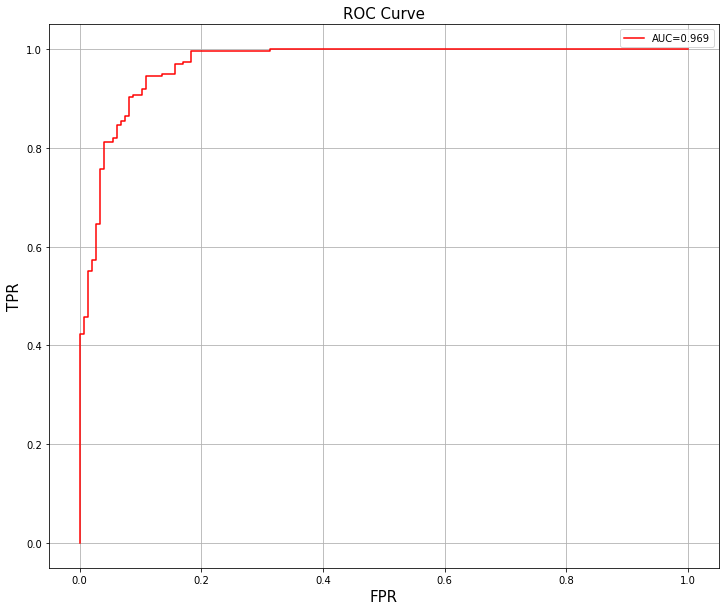

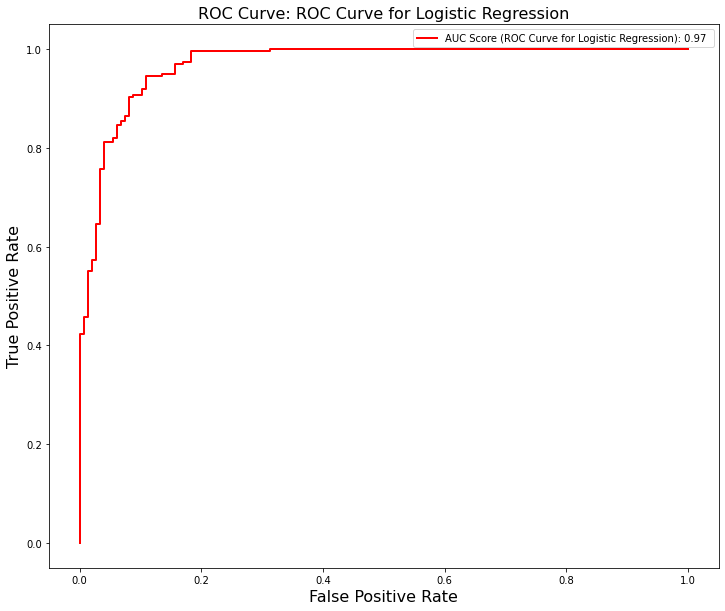

In [23]:

probs = d['Y_prob_train']
y_preds = d['Y_Prediction_Train']
y_original = np.squeeze(TrainingSetForY)
plotROC(y_original,y_preds,probs)
title = 'ROC Curve for Logistic Regression'
label = 'None'
# calculate the ROC score
fpr, tpr, thresholds = roc_curve(y_original, probs)
print('False Positive Rates: ')
for eachValue in fpr:
    print(eachValue)
print('True Positive Rates: ')
for eachValue in tpr:
    print(eachValue)
print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs)))    
label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_original, probs))
# plot the ROC curve
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, linewidth=2, label=label, color='red')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve: {}'.format(title), fontsize=16)
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 257.44, 'Predicted label')

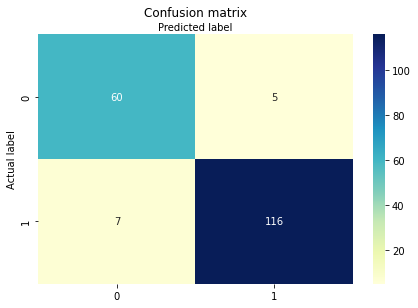

In [41]:
#Using Logistic Regression Algorithm to the Training Set Predefined model library
classifier = LogisticRegression(random_state = 0)
classifier.fit(TrainingSetForX, TrainingSetForY)
ScoreForY = classifier.decision_function(TestingDataForX)
#test the trained classifer
predictedY = classifier.predict(TestingDataForX)
predeictedYProb = classifier.predict_proba(TestingDataForX)[::,1]
 #checking the accuracy

cm = confusion_matrix(TestingDataForY, predictedY)
#---- plotting confusion matrix
class_names=classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating a heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
Y_proba = classifier.predict_proba(TestingDataForX)
#print('predicted probabilities',ScoreForY[:])
cs_score = classifier.score(TestingDataForX, TestingDataForY)
print('The test accuracy is:',cs_score)



The test accuracy is: 0.9361702127659575


AUC Score (ROC Curve for Logistic Regression): 0.98 


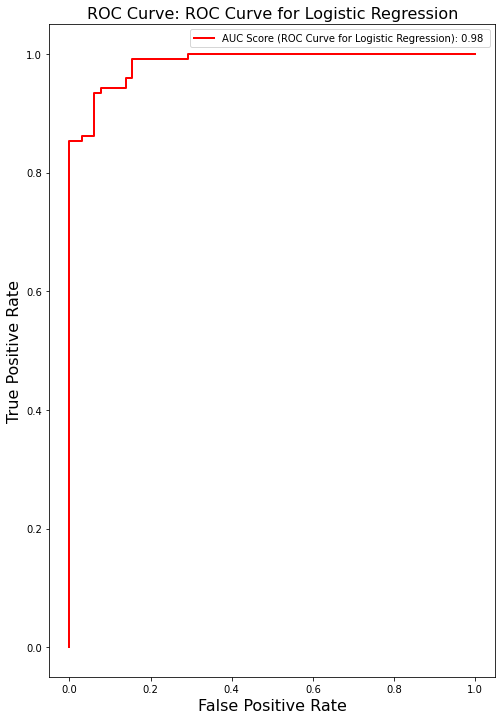

In [29]:
title = 'ROC Curve for Logistic Regression'
label = 'None'
# calculate the ROC score
fpr, tpr, thresholds = roc_curve(TestingDataForY, predeictedYProb)
print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(TestingDataForY, predeictedYProb)))    
label = 'AUC Score ({}): {:.2f} '.format(title, roc_auc_score(TestingDataForY, predeictedYProb))
# plot the ROC curve
plt.figure(figsize=(8,12))
plt.plot(fpr, tpr, linewidth=2, label=label, color='red')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve: {}'.format(title), fontsize=16)
plt.legend(loc='upper right')
plt.show()